In [23]:
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from utils import *
from selectVendas import *

In [25]:
model = load_model('Modelo_APS_GastronomIA.h5')

#vendas = pd.read_excel('./vendas.xlsx')
#vendas.sort_values(by=['data_venda'], ascending=True)
#vendas_por_dia = vendas.copy()
#vendas_por_dia = vendas_por_dia[['data_venda', 'valor']]
#nova_en-trada = vendas_por_dia.groupby(by=['data_venda']).sum()
#nova_entrada = nova_entrada.to_numpy()[-60:]
#nova_entrada.shape
nova_entrada = selectData()


c:\Users\denis\Desktop\Python\APS\selectVendas.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(sql, conn)


In [17]:
scaler = MinMaxScaler()
scaler.fit(nova_entrada)
nova_entrada = scaler.transform(nova_entrada)
x = nova_entrada
nova_entrada.shape

(60, 1)

In [18]:
nova_entrada  = nova_entrada.reshape(nova_entrada.shape[0])

In [19]:
step = 60
datax = convertToMatrixForPredict(nova_entrada, step)
datax = np.reshape(datax, (datax.shape[0], 1, datax.shape[1]))

In [20]:
aux = np.array(datax)
for i in range(30):
    resultado = model.predict(aux[-60:].reshape(1, 1, 60))

    aux = np.append(aux, resultado[0, 0])
    print(f'aux.shape: {aux.shape}')

resultList = aux[60:].copy()

1/1 [==============================] - 0s 169ms/step
aux.shape: (61,)
1/1 [==============================] - 0s 22ms/step
aux.shape: (62,)
1/1 [==============================] - 0s 19ms/step
aux.shape: (63,)
1/1 [==============================] - 0s 32ms/step
aux.shape: (64,)
1/1 [==============================] - 0s 23ms/step
aux.shape: (65,)
1/1 [==============================] - 0s 21ms/step
aux.shape: (66,)
1/1 [==============================] - 0s 27ms/step
aux.shape: (67,)
1/1 [==============================] - 0s 20ms/step
aux.shape: (68,)
1/1 [==============================] - 0s 24ms/step
aux.shape: (69,)
1/1 [==============================] - 0s 20ms/step
aux.shape: (70,)
1/1 [==============================] - 0s 23ms/step
aux.shape: (71,)
1/1 [==============================] - 0s 22ms/step
aux.shape: (72,)
1/1 [==============================] - 0s 23ms/step
aux.shape: (73,)
1/1 [==============================] - 0s 21ms/step
aux.shape: (74,)
1/1 [============================

In [21]:
resultado_inverse = scaler.inverse_transform(resultList.reshape((resultList.shape[0], 1)))
datax_inverse = scaler.inverse_transform(x)

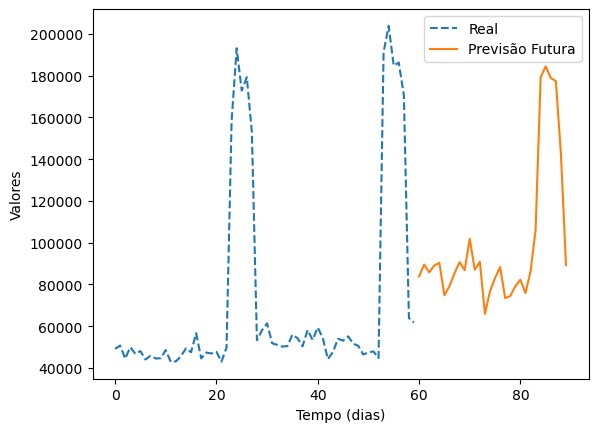

In [22]:
plt.plot(datax_inverse, label='Real', linestyle='dashed')
plt.plot(np.arange(len(datax_inverse), len(datax_inverse) + len(resultado_inverse)), resultado_inverse, label='Previsão Futura')
plt.xlabel('Tempo (dias)')
plt.ylabel('Valores')
plt.legend()
plt.show()